In [11]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Решить систему дифференциальных уравнений:

$$
    \begin{cases}
        u' = 998 u + 1998 v
        \\
        v'= - 999 u – 1999 v
    \end{cases}
$$

с начальными значениями $u(0) = v(0) = 1$ на отрезке интегрирования $[0, 10]$ двумя методами второго порядка аппроксимации:

* методом трапеций
* схемой CROS

Проделать вычисления при следующих шагах интегрирования: $h \in \{10^{-4}, 10^{-3}, 2.5\cdot10^{-3}, 5\cdot10^{-3}, 10^{-2}\}$. Решения сравнить между собой и с точным решением. Объяснить поведение метода трапеций при увеличении шага интегрирования.

---

Для начала введем обозначения:

$$
A = 
\begin{bmatrix}
    998 & 1998\\
    - 999 & -1999
\end{bmatrix}
$$

In [12]:
A        = np.float64(np.array([[998.,1998.],[-999.,-1999.]]))
y0       = np.float64(np.array([1., 1.]))
interval = np.float64([0., 10.])
steps    = np.float64([1e-4, 1e-3, 2.5*1e-3, 5*1e-3, 1e-2])

### 1 Точное решение

Получим точное решение:

$$
\begin{aligned}
u(t) = & 4 e^{-t} - 3 e^{-1000t}\\
v(t) = & 3 e^{-1000t} - 2 e^{-t}
\end{aligned}
$$

In [14]:
def u(t):
    return 4.*np.exp(-t)-3*np.exp(-1000.*t)

def v(t):
    return 3.*np.exp(-1000.*t)-2.*np.exp(-t)

In [15]:
exact_t = np.float64(np.arange(interval[0], interval[1], 1e-5))
exact_u = np.float64(u(exact_t))
exact_v = np.float64(v(exact_t))

Построим точное решение:

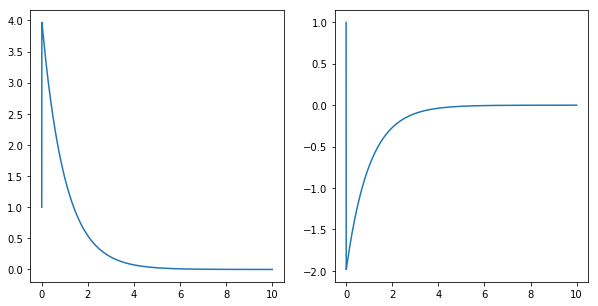

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(w=10,h=5)

i = 0
for ax in axes.flat:
    if i == 0:
        im = ax.plot(exact_t, exact_u)
    if i == 1:
        im = ax.plot(exact_t, exact_v)
    i = i + 1

### 2 Метод трапеций

Для метода трапеций известно:

$$
y_{n+1} - y_n = h\left(\cfrac12 f_{n+1} + \cfrac12 f_n \right)
$$

В наших обозначениях $y_n = \left(u_n, v_n\right)$, а $f_n = Ay_n$, где матрица $A$ определена выше. Справедливы следующие преобразования:

$$
\begin{aligned}
\begin{bmatrix}
u_{n+1}\\
v_{n+1}
\end{bmatrix} -
\begin{bmatrix}
u_{n}\\
v_{n}
\end{bmatrix} & = 
\cfrac{h}{2} A
\begin{bmatrix}
u_{n+1}\\
v_{n+1}
\end{bmatrix}
+ \cfrac{h}{2} A
\begin{bmatrix}
u_{n}\\
v_{n}
\end{bmatrix}
\\
\begin{bmatrix}
u_{n+1}\\
v_{n+1}
\end{bmatrix} -
\cfrac{h}{2} A
\begin{bmatrix}
u_{n+1}\\
v_{n+1}
\end{bmatrix}
 & = 
\cfrac{h}{2} A
\begin{bmatrix}
u_{n}\\
v_{n}
\end{bmatrix} + 
\begin{bmatrix}
u_{n}\\
v_{n}
\end{bmatrix}
\\
\left(E-\cfrac{h}{2} A\right)
\begin{bmatrix}
u_{n+1}\\
v_{n+1}
\end{bmatrix} 
 & = 
\left(\cfrac{h}{2} A + E\right)
\begin{bmatrix}
u_{n}\\
v_{n}
\end{bmatrix}
\\
\begin{bmatrix}
u_{n+1}\\
v_{n+1}
\end{bmatrix} 
 & = 
\left(E-\cfrac{h}{2} A\right)^{-1}\left(\cfrac{h}{2} A + E\right)
\begin{bmatrix}
u_{n}\\
v_{n}
\end{bmatrix}
\end{aligned}
$$

In [17]:
def trapezoid(A, y0, interval, h):
    y = [y0]
    u = [y0[0]]
    v = [y0[1]]
    t = [interval[0]]
    
    I = np.identity(2)
    B = I - 0.5*h*A
    C = I + 0.5*h*A
    
    while t[-1] < interval[1]:
        y_next = - np.linalg.inv(B).dot(C.dot(y[-1]))
        y.append(y_next)
        u.append(y_next[0])
        v.append(y_next[1],)
        t.append(t[-1] + h)
        
    return y, u, v, t

In [18]:
resTrap_u = [0]*len(steps)
resTrap_v = [0]*len(steps)
resTrap_t = [0]*len(steps)

for i in range(len(steps)):
    _, resTrap_u[i], resTrap_v[i], resTrap_t[i] = trapezoid(A=A, y0=y0, interval=interval, h=steps[i])

Строим графики для $u$:

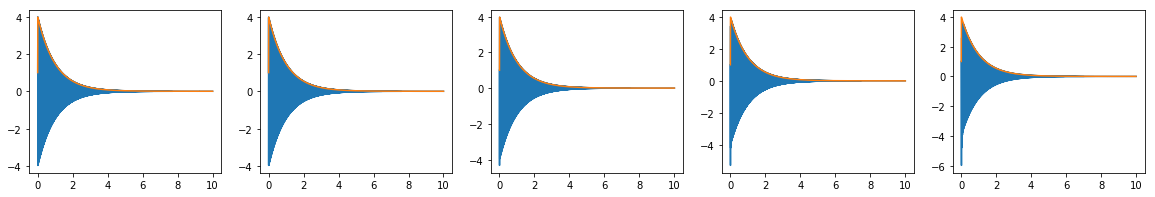

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=5)
fig.set_size_inches(w=20,h=3)

i = 0
for ax in axes.flat:
    im = ax.plot(resTrap_t[i], resTrap_u[i])
    im = ax.plot(exact_t, exact_u)
    i = i + 1

Показательно посмотреть на первые $100$ шагов по времени для $u$:

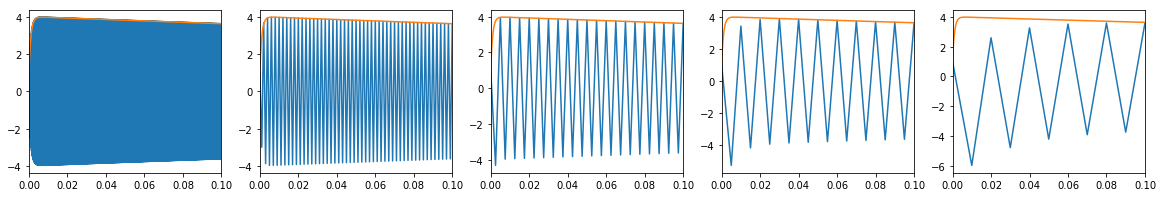

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=5)
fig.set_size_inches(w=20,h=3)

i = 0
for ax in axes.flat:
    im = ax.plot(resTrap_t[i], resTrap_u[i])
    im = ax.plot(exact_t, exact_u)
    ax.set_xlim(0, 0.1)
    i = i + 1

Строим графики для $v$:

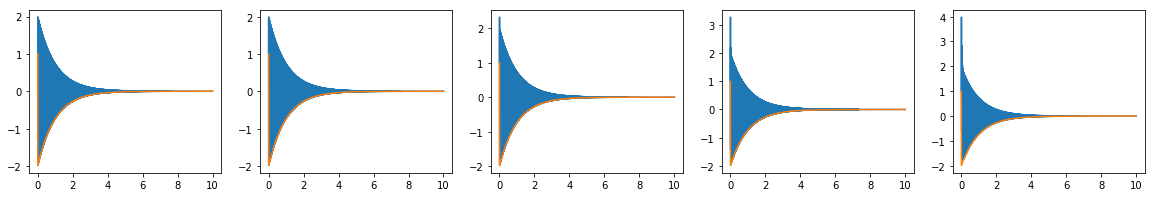

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=5)
fig.set_size_inches(w=20,h=3)

i = 0
for ax in axes.flat:
    im = ax.plot(resTrap_t[i], resTrap_v[i])
    im = ax.plot(exact_t, exact_v)
    i = i + 1

Показательно посмотреть на первые $100$ шагов по времени для $v$

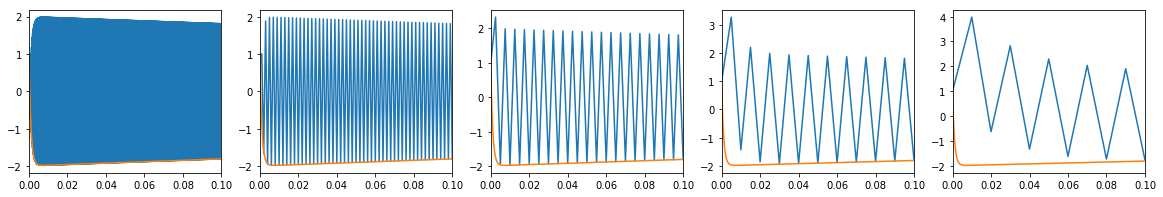

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=5)
fig.set_size_inches(w=20,h=3)

i = 0
for ax in axes.flat:
    im = ax.plot(resTrap_t[i], resTrap_v[i])
    im = ax.plot(exact_t, exact_v)
    ax.set_xlim(0, 0.1)
    i = i + 1

### 3 Метод Розенброка

Запишем метод Розенброка:

$$
\begin{aligned}
\left(I - \cfrac{1+i}{2}hJ\right)\mathbf{w} &= f\left(x_j + \cfrac{h}{2}, y_j\right)\\
y_{j+1} &= y_j + h \text{Re}\mathbf{w}
\end{aligned}
$$

Поскольку нашу систему можно переписать в виде $\frac{du}{dt} = Au$, то $J = A$

In [23]:
def CROS(A, y0, interval, h):
    y = [y0]
    u = [y0[0]]
    v = [y0[1]]
    t = [interval[0]]
    
    I = np.float64(np.array([[1,0],[0,1]]))
    B = np.complex64(np.linalg.inv(I - 0.5*(1.-1.j)*h*A))
    
    while t[-1] < interval[1]:
        w = np.complex64(B.dot(A.dot(y[-1])))
        y_next = np.float64(y[-1] + h * w.real)
        y.append(y_next)
        u.append(y_next[0])
        v.append(y_next[1],)
        t.append(t[-1] + h)
        
    return y, u, v, t

In [24]:
resCROS_u = [0]*len(steps)
resCROS_v = [0]*len(steps)
resCROS_t = [0]*len(steps)

for i in range(len(steps)):
    _, resCROS_u[i], resCROS_v[i], resCROS_t[i] = CROS(A=A, y0=y0, interval=interval, h=steps[i])

Строим графики для $u$:

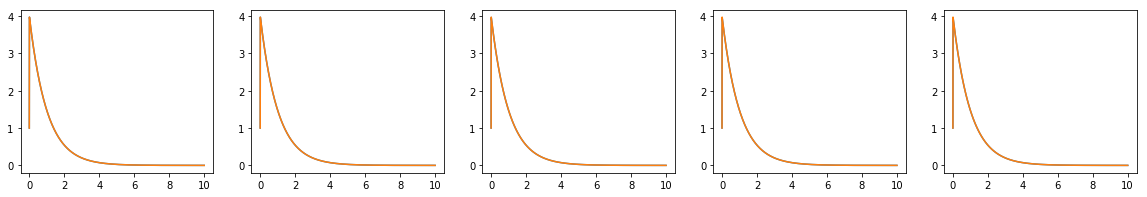

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=5)
fig.set_size_inches(w=20,h=3)

i = 0
for ax in axes.flat:
    im = ax.plot(resCROS_t[i], resCROS_u[i])
    im = ax.plot(exact_t, exact_u)
    i = i + 1

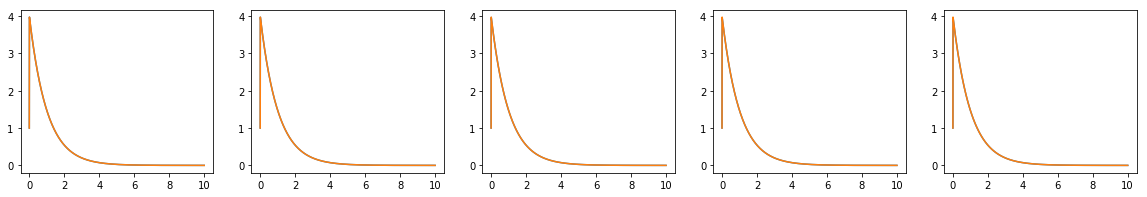

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=5)
fig.set_size_inches(w=20,h=3)

i = 0
for ax in axes.flat:
    im = ax.plot(resCROS_t[i], resCROS_u[i])
    im = ax.plot(exact_t, exact_u)
    i = i + 1

 ### 4 Порядок аппроксимации

In [30]:
temp = [0]*5

for i in range(5):
    start_index = int(0.02 / steps[i])
    temp[i] = max(abs(u(np.array(resCROS_t[i][start_index:])) - resCROS_u[i][start_index:]))/steps[i]**2

In [31]:
for i in range(5):
    print('Шаг: ', steps[i], '\t Отношение ошибки и h^2: ', temp[i])

Шаг:  0.0001 	 Отношение ошибки и h^2:  23.405322480130053
Шаг:  0.001 	 Отношение ошибки и h^2:  0.25950395254881187
Шаг:  0.0025 	 Отношение ошибки и h^2:  0.23468633116863202
Шаг:  0.005 	 Отношение ошибки и h^2:  1.0073853903058705
Шаг:  0.01 	 Отношение ошибки и h^2:  8.050853346115439


Более подробное исследование

In [39]:
diff = [0]*5

for i in range(5):
    start_index = int(0.02 / steps[i])
    diff[i] = abs(u(np.array(resCROS_t[i][start_index:])) - resCROS_u[i][start_index:])

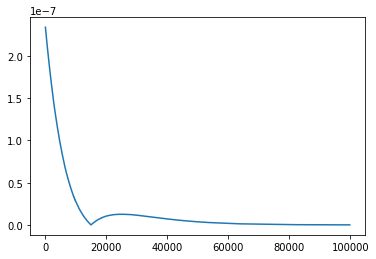

In [40]:
plt.plot(diff[0])